In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("salary data.csv")
print("Data imported")

Data imported


In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [5]:
X =  df.iloc[:,0:1].values
X.shape

(30, 1)

In [6]:
y =  df.iloc[:,1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

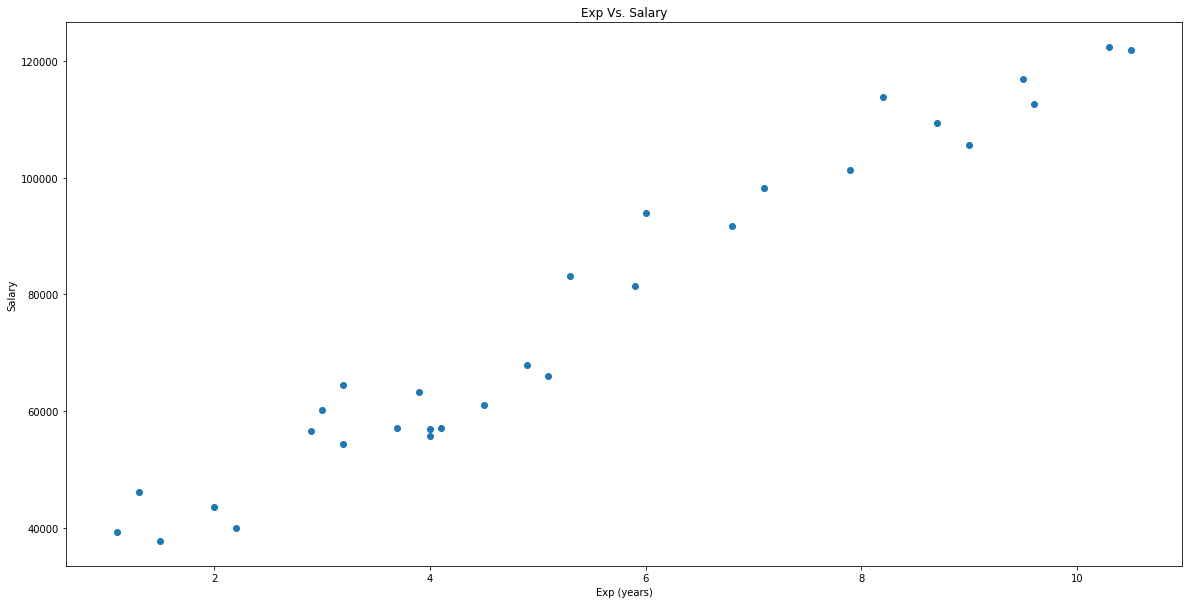

In [7]:
plt.figure(figsize = (20,10))
plt.scatter(X,y)
plt.xlabel("Exp (years)")
plt.ylabel("Salary")
plt.title("Exp Vs. Salary")
plt.show()

In [8]:
X.reshape(-1,1)
X.shape

(30, 1)

In [9]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0)

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
from sklearn.linear_model import LinearRegression

simplelinearregression = LinearRegression()
simplelinearregression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_pred = simplelinearregression.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

In [12]:
#plt.figure(figsize =(20,10))
#plt.scatter(X,y,color = 'red')
#plt.plot(X,y_pred,color = 'blue')
#plt.show()

**ValueError: x and y must have same first dimension, but have shapes (30, 1) and (10,)**

#### Calculate R squared:

In [13]:
from sklearn.metrics import accuracy_score
print('Linear Regression R squared": %.4f' % simplelinearregression.score(X_test, y_test))
print("So, in our model, %.4f of the variability in Y can be explained using X. That is really exciting." % simplelinearregression.score(X_test, y_test))

Linear Regression R squared": 0.9749
So, in our model, 0.9749 of the variability in Y can be explained using X. That is really exciting.


#### Calculate root-mean-square error (RMSE)

In [14]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)
print("Our model was able to predict the salary in the test set within %.4f of the real salary."% lin_rmse)

Linear Regression RMSE: 4585.4157
Our model was able to predict the salary in the test set within 4585.4157 of the real salary.


#### Calculate mean absolute error (MAE):

In [15]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression MAE: 3426.4269


In [16]:
#testing for a random value
y_pred_val = simplelinearregression.predict(11)
y_pred_val

array([129621.55911838])